In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset,DataLoader
import torch.nn as nn
import torch.optim as optim
import torch



In [2]:
torch.manual_seed(42)

In [3]:
df  = pd.read_csv("./fmnist_small.csv")

In [4]:
df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1,0,0,0,0,0,0,0,0,0,...,69,12,0,0,0,0,0,0,0,0
5996,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5997,8,0,0,0,0,0,0,0,0,0,...,39,47,2,0,0,29,0,0,0,0
5998,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# df.iloc[i,1:].values.reshape(28,28)

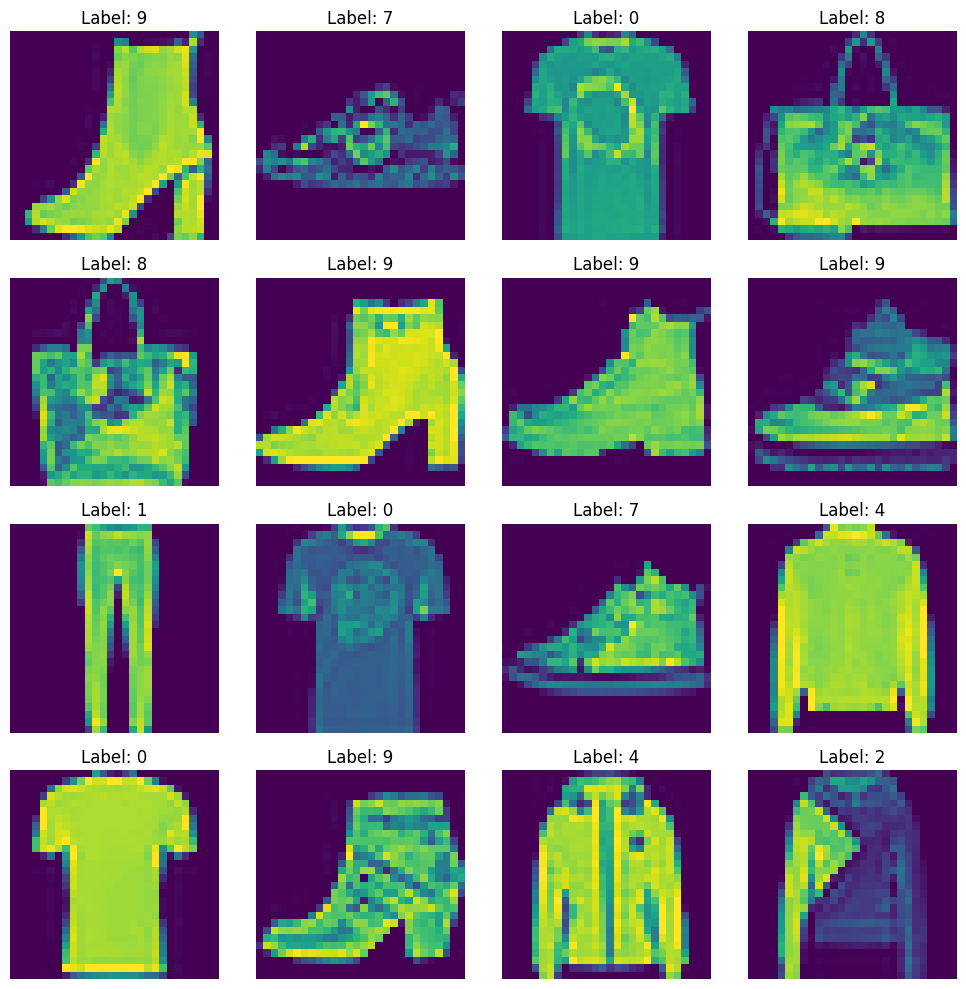

In [6]:
import matplotlib.pyplot as plt

fig,axes = plt.subplots(4,4,figsize=(10,10))

for i ,ax in enumerate(axes.flat):
    img = df.iloc[i,1:].values.reshape(28,28)
    ax.imshow(img)
    ax.axis("off")
    ax.set_title(f"Label: {df.iloc[i,0]}")
plt.tight_layout(rect=[0,0,1,1]
                 )
plt.show()


In [7]:
# train test split

X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# scaling the feautures
X_train = X_train/255.0
X_test = X_test/255.0

In [9]:
# create CustomDataset Class
class CustomDataset(Dataset):

  def __init__(self, features, labels):

    self.features = torch.tensor(features, dtype=torch.float32)
    self.labels = torch.tensor(labels, dtype=torch.long)

  def __len__(self):

    return len(self.features)

  def __getitem__(self, index):

    return self.features[index], self.labels[index]



In [10]:
# create train_dataset object
train_dataset = CustomDataset(X_train, y_train)

In [11]:
train_dataset.__getitem__(1)

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0039, 0.0000, 0.0000, 0.3843, 0.3765, 0.3922, 0.3804, 0.3176, 0.0000,
         0.0000, 0.0078, 0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0039,
         0.0000, 0.0000, 0.0000, 0.0275, 0.8627, 0.7059, 0.6196, 0.6471, 0.8157,
         0.0275, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000,
         0.0000, 0.0000, 0.0275, 0.3529, 0.7098, 0.5529, 0.7137, 0.8980, 0.7137,
         0.6471, 0.7765, 0.4353, 0.1608, 0.0000, 0.0000, 0.0000, 0.0039, 0.0039,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.3137, 0.5804, 0.7098, 0.7059, 0.5922, 0.5882, 0.5490, 0.7647,
         0.5765, 0.6588, 0.6157, 0.6863, 0.7686, 0.6588, 0.4196, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [12]:
# create test_dataset object
test_dataset = CustomDataset(X_test, y_test)

In [13]:
# create train and test loader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [14]:
train_loader

In [26]:
# # define NN class

# class MyNN(nn.Module):

#   def __init__(self, num_features):

#     super().__init__()
#     self.model = nn.Sequential(
#         nn.Linear(num_features, 128),
#         nn.BatchNorm1d(128),
#         nn.ReLU(),
#         nn.Dropout(p=0.3),
#         nn.Linear(128, 64),
#         nn.BatchNorm1d(64),
#         nn.ReLU(),
#         nn.Dropout(p=0.3),
#         nn.Linear(64, 10)
#     )

#   def forward(self, x):

#     return self.model(x)


device  = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# apply Hyperparameter tunning

In [34]:
class MyNN(nn.Module):
    def __init__(self, input_dim,output_dim,num_hidden_layers,neurons_per_layers,dropout_rate) -> None:
        super().__init__() # access the all method and variable nn.modules


        layers =[] 
        for i in range(num_hidden_layers):
            layers.append(nn.Linear(input_dim,neurons_per_layers))
            layers.append(nn.BatchNorm1d(neurons_per_layers))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout_rate))
            input_dim = neurons_per_layers

        layers.append(nn.Linear(neurons_per_layers,output_dim))

        self.model = nn.Sequential(*layers)

    def forward(self,x):
        return self.model(x)

In [35]:
# objective function
def objective(trial):

  # next hyperparameter values from the search space
  num_hidden_layers = trial.suggest_int("num_hidden_layers", 1, 5)
  neurons_per_layer = trial.suggest_int("neurons_per_layer", 8, 128, step=8)
  epochs = trial.suggest_int("epochs", 10, 50, step=10)
  learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True)
  dropout_rate = trial.suggest_float("dropout_rate", 0.1, 0.5, step=0.1)
  batch_size = trial.suggest_categorical("batch_size", [16, 32, 64, 128])
  optimizer_name = trial.suggest_categorical("optimizer", ['Adam', 'SGD', 'RMSprop'])
  weight_decay = trial.suggest_float("weight_decay", 1e-5, 1e-3, log=True)

  train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, pin_memory=True)
  test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, pin_memory=True)

  # model init
  input_dim = 784
  output_dim = 10

  model = MyNN(input_dim, output_dim, num_hidden_layers, neurons_per_layer, dropout_rate)
  model.to(device)

  # optimizer selection
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(model.parameters(), lr=0.1, weight_decay=1e-4)

  if optimizer_name == 'Adam':
    optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
  elif optimizer_name == 'SGD':
    optim.SGD(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
  else:
    optim.RMSprop(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

  # training loop

  for epoch in range(epochs):

    for batch_features, batch_labels in train_loader:

      # move data to gpu
      batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

      # forward pass
      outputs = model(batch_features)

      # calculate loss
      loss = criterion(outputs, batch_labels)

      # back pass
      optimizer.zero_grad()
      loss.backward()

      # update grads
      optimizer.step()


  # evaluation
  model.eval()
  # evaluation on test data
  total = 0
  correct = 0

  with torch.no_grad():

    for batch_features, batch_labels in test_loader:

      # move data to gpu
      batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

      outputs = model(batch_features)

      _, predicted = torch.max(outputs, 1)

      total = total + batch_labels.shape[0]

      correct = correct + (predicted == batch_labels).sum().item()

    accuracy = correct/total

  return accuracy

In [36]:

# !pip install optuna

In [37]:
import optuna
study = optuna.create_study(direction='maximize')

[I 2025-04-30 16:44:58,851] A new study created in memory with name: no-name-9d10f115-4707-436d-948d-1449fc1f405d


In [ ]:
study.optimize(objective,n_trials=10)

[I 2025-04-30 16:45:03,383] Trial 0 finished with value: 0.7216666666666667 and parameters: {'num_hidden_layers': 4, 'neurons_per_layer': 8, 'epochs': 20, 'learning_rate': 4.176317165556242e-05, 'dropout_rate': 0.1, 'batch_size': 64, 'optimizer': 'SGD', 'weight_decay': 3.633727715615207e-05}. Best is trial 0 with value: 0.7216666666666667.
[I 2025-04-30 16:45:22,171] Trial 1 finished with value: 0.8233333333333334 and parameters: {'num_hidden_layers': 4, 'neurons_per_layer': 72, 'epochs': 30, 'learning_rate': 0.004274167526654806, 'dropout_rate': 0.2, 'batch_size': 16, 'optimizer': 'Adam', 'weight_decay': 0.0004951967780596353}. Best is trial 1 with value: 0.8233333333333334.


In [ ]:
study.best_params

ValueError: No trials are completed yet.

In [ ]:
study.best_params

In [16]:
# set learning rate and epochs
epochs = 100
learning_rate = 0.1

In [17]:
# instatiate the model
model = MyNN(X_train.shape[1])

# loss function
# use the gpu if availble 


In [18]:
device = torch.device('cuda' if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [19]:
device = torch.device('cuda' if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [20]:

model.to(device)
criterion = nn.CrossEntropyLoss()

# optimizer
optimizer = optim.SGD(model.parameters(), lr= learning_rate,weight_decay=1e-4) 

# weight_decay=1e-4  regulization

In [21]:
# training loop

for epoch in range(epochs):

  total_epoch_loss = 0

  for batch_features, batch_labels in train_loader:

    # forward pass
    batch_features = batch_features.to(device)
    batch_labels = batch_labels.to(device)
    
    outputs = model(batch_features)

    # calculate loss
    loss = criterion(outputs, batch_labels)

    # back pass
    optimizer.zero_grad()
    loss.backward()

    # update grads
    optimizer.step()

    total_epoch_loss = total_epoch_loss + loss.item()

  avg_loss = total_epoch_loss/len(train_loader)
  print(f'Epoch: {epoch + 1} , Loss: {avg_loss}')

Epoch: 1 , Loss: 0.973299796183904
Epoch: 2 , Loss: 0.6825804277261098
Epoch: 3 , Loss: 0.6201567866404851
Epoch: 4 , Loss: 0.577979056040446
Epoch: 5 , Loss: 0.5303478293617566
Epoch: 6 , Loss: 0.5128572050730388
Epoch: 7 , Loss: 0.4904886027177175
Epoch: 8 , Loss: 0.47927016705274583
Epoch: 9 , Loss: 0.43062930246194203
Epoch: 10 , Loss: 0.4264307456215223
Epoch: 11 , Loss: 0.40907008707523346
Epoch: 12 , Loss: 0.4030224364002546
Epoch: 13 , Loss: 0.4040957683324814
Epoch: 14 , Loss: 0.3788634930551052
Epoch: 15 , Loss: 0.3674870274464289
Epoch: 16 , Loss: 0.34247745220859843
Epoch: 17 , Loss: 0.3418970882395903
Epoch: 18 , Loss: 0.35003608440359435
Epoch: 19 , Loss: 0.3277311221758525
Epoch: 20 , Loss: 0.317414446969827
Epoch: 21 , Loss: 0.32623925889531774
Epoch: 22 , Loss: 0.31465804795424146
Epoch: 23 , Loss: 0.29060092677672705
Epoch: 24 , Loss: 0.2971381023277839
Epoch: 25 , Loss: 0.30064310133457184
Epoch: 26 , Loss: 0.2654985119402409
Epoch: 27 , Loss: 0.28307518834869067
Epo

In [22]:
# set model to eval mode
model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [23]:
# evaluation code test data
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in test_loader:
    batch_features = batch_features.to(device)
    batch_labels = batch_labels.to(device)
    

    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)

0.8308333333333333


In [24]:
# evaluation code train data
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in train_loader:
    batch_features = batch_features.to(device)
    batch_labels = batch_labels.to(device)
    

    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)

0.981875


In [24]:
len(test_loader)

38

In [25]:
import torch

In [26]:
device = torch.device('cuda' if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [27]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

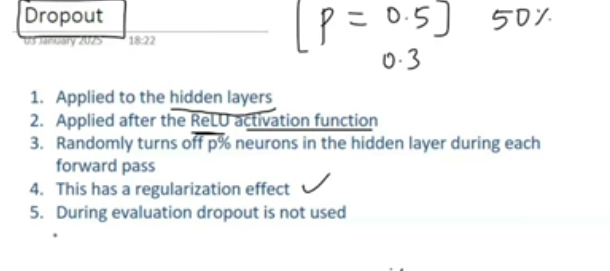